In [ ]:
def preprocess_dataset(dataset):
    # preprocess gas and concerntration ( col = 0 )
    gas_name_lst = []
    concentration_lst=[]

    for element in dataset[0]:
        gas_name, concentration = element.split(";")
        gas_name_lst.append(gas_name)
        concentration_lst.append(float(concentration))

    dataset["gas"] = gas_name_lst
    dataset["concentration"] = concentration_lst

    # preprocess feature 1-128 ( col = 1-128 )
    for feature in range(1, 129):
        dataset[feature] = dataset[feature].str.extract(r'((?<=\:)[^\]]+)')
        dataset[feature] = dataset[feature].astype(float)
    dataset = dataset.drop(columns=[0])

    return dataset

In [ ]:
import pandas as pd
import numpy as np
count = 0
c_=[]
for i in range(1, 11):
    dataset = pd.read_table("batch"+str(i)+".dat",sep="\s+",header=None)
    # print(dataset.head())
    new_dataset = pd.DataFrame()
    new_dataset = preprocess_dataset(dataset)
    for element in new_dataset["concentration"].unique():
        if float(element) not in c_:
            c_.append(float(element))


In [ ]:
print(len(c_))

59


In [ ]:
batch_1 = pd.DataFrame()
batch_10 = pd.DataFrame()
batch_1 =preprocess_dataset( pd.read_table("batch1.dat", sep="\s+", header = None))
batch_10 = preprocess_dataset( pd.read_table("batch10.dat", sep="\s+", header = None))

print(batch_1.head())
print(batch_10.head())

gas_category = 6
max_gas = 0
max_num=0
for gas in range(1,gas_category+1):
    concentration_category_1 = batch_1[(batch_1["gas"]==str(gas))]["concentration"].unique()
    concentration_category_10 = batch_10[(batch_10["gas"]==str(gas))]["concentration"].unique()
    concentration_category = list(set(concentration_category_1) & set(concentration_category_10)) #找交集
    # print(concentration_category_1)
    # print(concentration_category_10)
    # print(concentration_category)
    # print("\n")
    for concentration in concentration_category:
        gas_con_1 = batch_1[(batch_1["gas"]==str(gas)) & (batch_1["concentration"]==concentration)].drop(columns=["gas", "concentration"])
        gas_con_10 = batch_10[(batch_10["gas"]==str(gas)) & (batch_10["concentration"]==concentration)].drop(columns=["gas", "concentration"])
        m_1 = gas_con_1.mean()
        m_10 = gas_con_10.mean()
        num = max(abs(m_10-m_1)/abs(m_1))
        if num>max_num:
            max_num = num
            max_gas = gas
print("max_gas, max_num\n")     
print(max_gas, max_num)

            1         2          3  ...       128  gas  concentration
0  15596.1621  1.868245   2.371604  ... -2.654529    1           10.0
1  26402.0704  2.532401   5.411209  ... -1.749225    1           20.0
2  42103.5820  3.454189   8.198175  ... -2.348370    1           30.0
3  42825.9883  3.451192  12.113940  ... -2.488957    1           40.0
4  58151.1757  4.194839  11.455096  ... -4.088756    1           50.0

[5 rows x 130 columns]
            1          2          3  ...        128  gas  concentration
0  12285.6582   4.076635   4.842317  ...  -3.521663    4           10.0
1    -35.6889   0.993944   0.166099  ...  -4.635975    3           50.0
2  63927.2217  14.956941  19.971376  ... -19.326895    4          250.0
3   2992.9019   1.380553   0.808910  ...  -6.472439    3          600.0
4  57524.7812  11.912566  14.631496  ...  -8.510591    4          150.0

[5 rows x 130 columns]
max_gas, max_num

2 28.391856713088817


若要觀察16個感測器的特徵在某個氣體，某個濃度下，使用PCA將樣本(同一種氣體，在同一濃度下所有時期樣本)由128維度降至2維來呈現在不同時期的樣本確實呈現分布上的差異，來證實16個感測器整體上確實有感測器飄移現象。請問下面哪一張圖呈現的是氣體編號5號，在濃度10時的樣本分布。


In [ ]:
for i in range(1,11):
    batch = pd.DataFrame()
    batch = preprocess_dataset( pd.read_table("batch"+str(i)+".dat", sep="\s+", header = None))
    tt = batch[(batch["gas"]=="6")&(batch["concentration"]==10.0)]
    print("---------------------------batch"+str(i)+"------------------------------------")
    print(tt)

---------------------------batch1------------------------------------
              1         2          3  ...       128  gas  concentration
380  73888.5136  6.262925  15.478080  ... -1.810275    6           10.0
393  72422.7216  5.885755  15.150329  ... -1.783327    6           10.0
408  71878.8310  5.763069  15.442017  ... -2.054343    6           10.0
423  74608.7041  7.165237  13.458256  ... -2.008253    6           10.0
440  74805.0518  6.707129  15.446750  ... -2.153036    6           10.0

[5 rows x 130 columns]
---------------------------batch2------------------------------------
Empty DataFrame
Columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,

## 4. 根據下圖指出這四條曲線分別是下面哪一個分類器?

In [ ]:
def evaluation(classifier):
    acc = []
    for i in range(2, 11):
        dataset = pd.read_table("batch"+str(i)+".dat",sep="\s+",header=None)
        # print(dataset.head())
        new_dataset = pd.DataFrame()
        new_dataset = preprocess_dataset(dataset)
        X_2 = new_dataset.drop(columns=["gas", "concentration"])
        y_2 = new_dataset[["gas"]]
        prediction = classifier.predict(X_2)
        acc.append(classifier.score(X_2, y_2))
    return acc

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, scale

X = batch_1.drop(columns=["gas", "concentration"])
y = batch_1[["gas"]]
svm_clf_param = {'C':[10**i for i in range(-10,10)]}

# RBF+SVM
svm_clf = SVC(kernel="rbf", gamma='auto')
svm_gs = GridSearchCV(estimator = svm_clf, param_grid = svm_clf_param , scoring = 'accuracy', cv = 5)
svm_gs.fit(X,y)
acc_rbf_svm = evaluation(svm_gs)

# RBF+SVM(with standardlization)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
svm_clf_param = {'clf__gamma':[10**i for i in range(-10,10)]}
pipe_svm = Pipeline([('scaler', StandardScaler()), ('clf', SVC(kernel="rbf", gamma='auto'))])
std_svm = GridSearchCV(estimator = pipe_svm, param_grid = svm_clf_param, scoring = 'accuracy', cv = 5)
std_svm.fit(X,y)
acc_std_svm = []
for i in range(2, 11):
    dataset = pd.read_table("batch"+str(i)+".dat",sep="\s+",header=None)
    new_dataset = pd.DataFrame()
    new_dataset = preprocess_dataset(dataset)
    X_2 = new_dataset.drop(columns=["gas", "concentration"])
    y_2 = new_dataset[["gas"]]
    prediction = std_svm.predict(X_2)
    acc_std_svm.append(std_svm.score(X_2, y_2))



In [ ]:
#stdscaler + selector + pca20 +rbf svm
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
std_select_svm_pipe = Pipeline([('scaler', StandardScaler()),
                           ('feature_select',SelectKBest(score_func=mutual_info_classif,k=50)),
                           ('pca', PCA(n_components=20)),
                           ('clf', SVC(kernel="rbf", gamma='auto'))])

std_select_svm = GridSearchCV(estimator = std_select_svm_pipe, param_grid = svm_clf_param, scoring = 'accuracy', cv = 5)
std_select_svm.fit(X, y)
acc_std_select_svm = []

for i in range(2, 11):
    dataset = pd.read_table("batch"+str(i)+".dat",sep="\s+",header=None)
    new_dataset = pd.DataFrame()
    new_dataset = preprocess_dataset(dataset)
    X_2 = new_dataset.drop(columns=["gas", "concentration"])
    # X_2 = StandardScaler().fit_transform(new_dataset.drop(columns=["gas", "concentration"]))
    y_2 = new_dataset[["gas"]]
    prediction = std_select_svm.predict(X_2)
    acc_std_select_svm.append(std_select_svm.score(X_2, y_2))

In [ ]:
# customized_normalization+lda+rbf svm
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import Normalizer,MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

std_nor_svm_pipe = Pipeline([('normalize', Normalizer()),
                           ('lda', LDA()),
                           ('clf', SVC(kernel="rbf", gamma='auto'))])

std_nor_svm = GridSearchCV(estimator = std_nor_svm_pipe, param_grid = svm_clf_param, scoring = 'accuracy', cv = 5)
std_nor_svm.fit(X, y)
acc_nor_lda_svm = []

for i in range(2, 11):
    dataset = pd.read_table("batch"+str(i)+".dat",sep="\s+",header=None)
    new_dataset = pd.DataFrame()
    new_dataset = preprocess_dataset(dataset)
    X_2 = new_dataset.drop(columns=["gas", "concentration"])
    # X_2 = Normalizer().fit_transform(new_dataset.drop(columns=["gas", "concentration"]))
    y_2 = new_dataset[["gas"]]
    p = std_nor_svm.predict(X_2)
    acc_nor_lda_svm.append(std_nor_svm.score(X_2, y_2))

In [ ]:
# print(acc_nor_lda_svm)
print(pipe_svm.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'clf', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'clf__C', 'clf__break_ties', 'clf__cache_size', 'clf__class_weight', 'clf__coef0', 'clf__decision_function_shape', 'clf__degree', 'clf__gamma', 'clf__kernel', 'clf__max_iter', 'clf__probability', 'clf__random_state', 'clf__shrinking', 'clf__tol', 'clf__verbose'])


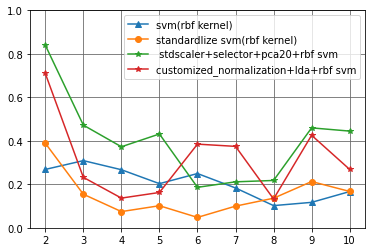

In [ ]:
import matplotlib.pyplot as plt
bat=[2,3,4,5,6,7,8,9,10]
plt.ylim(0, 1.0)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.plot(bat,acc_rbf_svm, marker="^", label="svm(rbf kernel)")
plt.plot(bat,acc_std_svm, marker="o", label="standardlize svm(rbf kernel)")
plt.plot(bat,acc_std_select_svm, marker="*", label=" stdscaler+selector+pca20+rbf svm")
plt.plot(bat,acc_nor_lda_svm, marker="*", label="customized_normalization+lda+rbf svm")
plt.legend()